In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf

In [3]:
fl=open("./Data_set.pkl",'rb')
data=pickle.load(fl)

In [4]:
data.keys()

dict_keys(['File_location', 'Anomaly_type', 'Anomaly_frame'])

In [5]:
frames=[]
class_type=[]
path="./out/"

In [6]:
for i,frm in enumerate(data['Anomaly_frame']):
    if len(frm) != 0:
        vid_path=os.path.join(path,data['File_location'][i] )
        with open(vid_path,'r') as f:
            lines = f.read().splitlines()
        for frm_no in data['Anomaly_frame'][i]:
            frames.append(np.float32(lines[frm_no].split()))
            class_type.append(data['Anomaly_type'])
    

### Dataset is now ready
### frames_list contains video frames which has anomaly and class_type has kind of anomaly(Fighting/Accident)

In [7]:
len(frames),len(class_type)

(734, 734)

In [8]:
frames=np.array(frames)
class_type =np.array(class_type)
class_type = class_type.flatten()

In [9]:
from tensorflow.contrib.layers import fully_connected,dropout

In [10]:
n_inputs = 4096
n_hidden1 = 512
n_hidden2 = 100
n_outputs = 2

In [11]:
X=tf.placeholder(tf.float32,shape=(None,n_inputs)
                ,name='X')
Y=tf.placeholder(tf.int64,shape=(None),name='Y')

In [12]:
with tf.name_scope("dnn"):
    hidden1 = fully_connected(X,n_hidden1,scope="hidden1")
    
    hidden1_drop=dropout(hidden1,keep_prob=0.4)
    
    hidden2 = fully_connected(hidden1_drop,n_hidden1,scope="hidden2")
    
    hidden2_drop=dropout(hidden2,keep_prob=0.6)
    
    logits=fully_connected(hidden2_drop,n_outputs,scope="output",activation_fn=None)

In [13]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=Y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [14]:
learning_rate = 0.01
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [15]:
with tf.name_scope("blaa"):
    correct = tf.nn.in_top_k(logits, Y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [16]:
n_epochs = 100
batch_size = 50
batch_training=50
accTr=[]
accTst=[]
saver = tf.train.Saver()

In [17]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


In [18]:

for epoch in range(n_epochs):
    for iteration in range(10):

        rndm = np.random.randint(0,733,batch_size) # taking random frames
        X_batch = frames[rndm]
        Y_batch = class_type[rndm]


        sess.run(training_op, feed_dict={X: X_batch, Y: Y_batch})


    acc_train = accuracy.eval(session=sess,feed_dict={X: X_batch, Y: Y_batch})
    
    accTr.append(acc_train)

    rndm = np.random.randint(0,733,30)

    X_test = frames[rndm]
    Y_test = class_type[rndm]

    acc_test = accuracy.eval(session=sess,feed_dict={X: X_test,
    Y: Y_test})
    
    accTst.append(acc_test)

    print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    if epoch%50 ==1:
        saved_path = saver.save(sess, './classification_model/'+str(epoch)+'/model', global_step=epoch)


0 Train accuracy: 0.86 Test accuracy: 0.8333333
1 Train accuracy: 0.88 Test accuracy: 0.93333334
2 Train accuracy: 0.84 Test accuracy: 0.96666664
3 Train accuracy: 0.86 Test accuracy: 0.96666664
4 Train accuracy: 0.98 Test accuracy: 0.9
5 Train accuracy: 0.94 Test accuracy: 0.96666664
6 Train accuracy: 0.98 Test accuracy: 0.96666664
7 Train accuracy: 0.98 Test accuracy: 0.96666664
8 Train accuracy: 0.94 Test accuracy: 0.96666664
9 Train accuracy: 0.98 Test accuracy: 1.0
10 Train accuracy: 0.96 Test accuracy: 1.0
11 Train accuracy: 0.98 Test accuracy: 0.93333334
12 Train accuracy: 0.96 Test accuracy: 0.93333334
13 Train accuracy: 0.9 Test accuracy: 1.0
14 Train accuracy: 1.0 Test accuracy: 0.9
15 Train accuracy: 0.96 Test accuracy: 0.96666664
16 Train accuracy: 0.96 Test accuracy: 0.9
17 Train accuracy: 0.94 Test accuracy: 0.9
18 Train accuracy: 0.98 Test accuracy: 0.93333334
19 Train accuracy: 1.0 Test accuracy: 1.0
20 Train accuracy: 0.92 Test accuracy: 1.0
21 Train accuracy: 0.98 Tes

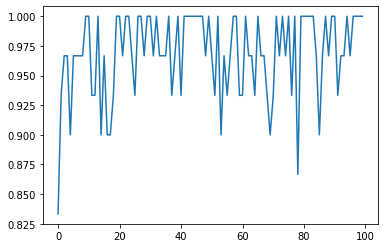

In [21]:
plt.plot(accTst)

In [20]:
acc_test

1.0